# Get the data from Kaggle

[GTSRB Dataset](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 612M/612M [00:11<00:00, 38.3MB/s]



In [1]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

# Load the data

In [ ]:
!unzip 'gtsrb-german-traffic-sign.zip' -d 'gtsrb'

Streaming output truncated to the last 5000 lines.
  inflating: gtsrb/train/5/00005_00053_00010.png  
  inflating: gtsrb/train/5/00005_00053_00011.png  
  inflating: gtsrb/train/5/00005_00053_00012.png  
  inflating: gtsrb/train/5/00005_00053_00013.png  
  inflating: gtsrb/train/5/00005_00053_00014.png  
  inflating: gtsrb/train/5/00005_00053_00015.png  
  inflating: gtsrb/train/5/00005_00053_00016.png  
  inflating: gtsrb/train/5/00005_00053_00017.png  
  inflating: gtsrb/train/5/00005_00053_00018.png  
  inflating: gtsrb/train/5/00005_00053_00019.png  
  inflating: gtsrb/train/5/00005_00053_00020.png  
  inflating: gtsrb/train/5/00005_00053_00021.png  
  inflating: gtsrb/train/5/00005_00053_00022.png  
  inflating: gtsrb/train/5/00005_00053_00023.png  
  inflating: gtsrb/train/5/00005_00053_00024.png  
  inflating: gtsrb/train/5/00005_00053_00025.png  
  inflating: gtsrb/train/5/00005_00053_00026.png  
  inflating: gtsrb/train/5/00005_00053_00027.png  
  inflating: gtsrb/train/5/0000

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'gtsrb/Train',
    shuffle = True,
    image_size = (32, 32),
    batch_size = 32,
    seed = 42
)

Found 39209 files belonging to 43 classes.


In [ ]:
len(dataset)*32, len(dataset)

(39232, 1226)

In [ ]:
#classes = dataset.class_names
#classes

classes = ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26',
            '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6',
            '7', '8', '9']

In [ ]:
class_names = { '0':'Speed limit (20km/h)',
                '1':'Speed limit (30km/h)', 
                '2':'Speed limit (50km/h)', 
                '3':'Speed limit (60km/h)', 
                '4':'Speed limit (70km/h)', 
                '5':'Speed limit (80km/h)', 
                '6':'End of speed limit (80km/h)', 
                '7':'Speed limit (100km/h)', 
                '8':'Speed limit (120km/h)', 
                '9':'No passing', 
                '10':'No passing veh over 3.5 tons', 
                '11':'Right-of-way at intersection', 
                '12':'Priority road', 
                '13':'Yield', 
                '14':'Stop', 
                '15':'No vehicles', 
                '16':'Veh > 3.5 tons prohibited', 
                '17':'No entry', 
                '18':'General caution', 
                '19':'Dangerous curve left', 
                '20':'Dangerous curve right', 
                '21':'Double curve', 
                '22':'Bumpy road', 
                '23':'Slippery road', 
                '24':'Road narrows on the right', 
                '25':'Road work', 
                '26':'Traffic signals', 
                '27':'Pedestrians', 
                '28':'Children crossing', 
                '29':'Bicycles crossing', 
                '30':'Beware of ice/snow',
                '31':'Wild animals crossing', 
                '32':'End speed + passing limits', 
                '33':'Turn right ahead', 
                '34':'Turn left ahead', 
                '35':'Ahead only', 
                '36':'Go straight or right', 
                '37':'Go straight or left', 
                '38':'Keep right', 
                '39':'Keep left', 
                '40':'Roundabout mandatory', 
                '41':'End of no passing', 
                '42':'End no passing veh > 3.5 tons'}

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 32, 32, 3)
[ 8 12  4  4 27 32 19  3 29 13 38 10 18  5 25 19 18  1 35 23 12  5  5 12
 12 41 40  2  4 15  7 37]


# Visualize data

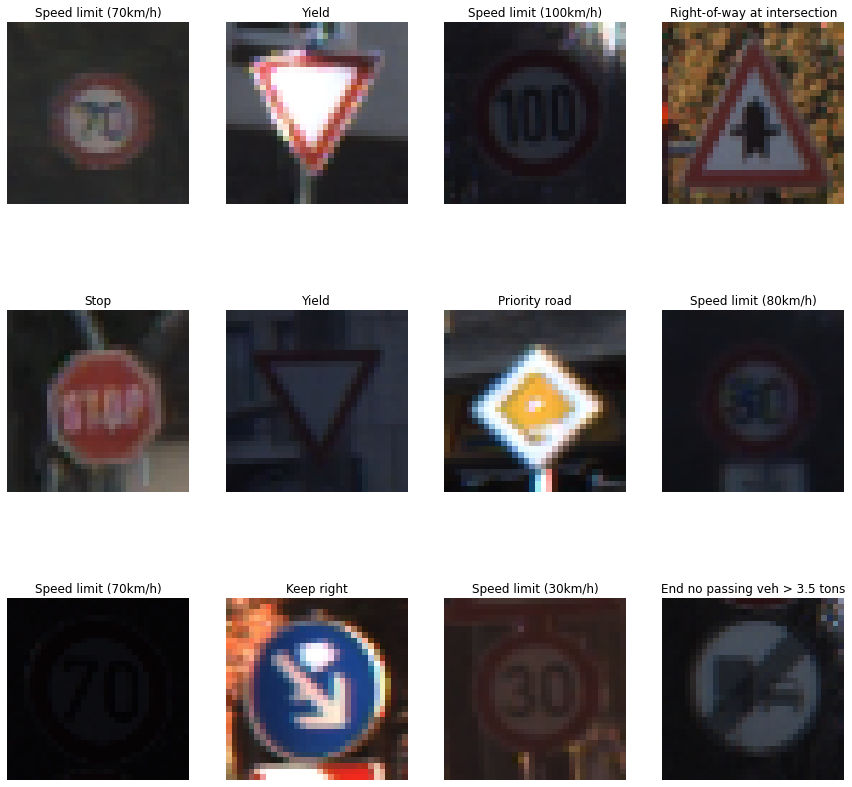

In [ ]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[classes[labels_batch[i]]])
        plt.axis("off")

# Split dataset

In [ ]:
train_len = int(len(dataset)*.8)
train_len

980

In [ ]:
training = dataset.take(train_len)
len(training)

980

In [ ]:
validation = dataset.skip(train_len)
val_size = int(len(dataset) * .1)
val_size

122

In [ ]:
test = validation.take(122)
validation = validation.skip(122)

In [ ]:
len(training), len(validation), len(test)

(980, 124, 122)

In [ ]:
for image, label in training.take(1):
  print(image.shape)
  print(label.shape)

(32, 32, 32, 3)
(32,)


# Build the Model

In [2]:
input_shape = (32, 32, 3)

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = input_shape),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    Conv2D(filters = 32, kernel_size = 2, activation = 'relu'),
    MaxPool2D(2),
    Dropout(.3),
    Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    MaxPool2D(2),
    Dropout(.3),
    Conv2D(filters = 512, kernel_size = 3, activation = 'relu'),
    Dropout(.3),
    Conv2D(filters = 512, kernel_size = 3, activation = 'relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(4096, activation = 'relu'),
    Dense(4096, activation = 'relu'),
    Dense(43, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 31, 31, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                    

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_accuracy') > .99:
      print("\nReached Validation Accuracy of 99%")
      self.model.stop_training = True

callbacks = MyCallback()

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training, epochs = 20, validation_data = validation, callbacks=[callbacks])

Epoch 1/20
980/980 [==============================] - 66s 36ms/step - loss: 3.5178 - accuracy: 0.0621 - val_loss: 3.5371 - val_accuracy: 0.0743
Epoch 2/20
980/980 [==============================] - 34s 35ms/step - loss: 3.3681 - accuracy: 0.1080 - val_loss: 3.1607 - val_accuracy: 0.1455
Epoch 3/20
980/980 [==============================] - 34s 35ms/step - loss: 2.7118 - accuracy: 0.2298 - val_loss: 2.2870 - val_accuracy: 0.3229
Epoch 4/20
980/980 [==============================] - 34s 35ms/step - loss: 1.9680 - accuracy: 0.3931 - val_loss: 1.6394 - val_accuracy: 0.4646
Epoch 5/20
980/980 [==============================] - 35s 35ms/step - loss: 1.4356 - accuracy: 0.5393 - val_loss: 1.1289 - val_accuracy: 0.6553
Epoch 6/20
980/980 [==============================] - 34s 35ms/step - loss: 1.0134 - accuracy: 0.6746 - val_loss: 0.7420 - val_accuracy: 0.7790
Epoch 7/20
980/980 [==============================] - 35s 35ms/step - loss: 0.7290 - accuracy: 0.7629 - val_loss: 0.5330 - val_accuracy:

In [ ]:
model.evaluate(test)

122/122 [==============================] - 12s 16ms/step - loss: 0.0480 - accuracy: 0.9903


[0.04801733046770096, 0.9902663826942444]

# Save the Model

In [ ]:
model.save('/content/drive/MyDrive/Traffic Sign Recognition/model_v1.h5')

In [ ]:
model.save_weights('/content/drive/MyDrive/Traffic Sign Recognition/weights.h5')

# Plot the Accuracy and Loss

In [ ]:
history.params

{'epochs': 20, 'steps': 980, 'verbose': 1}

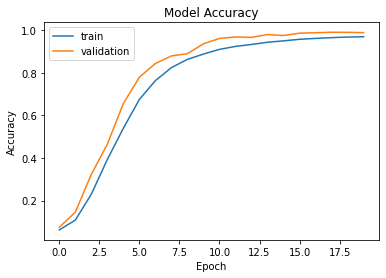

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

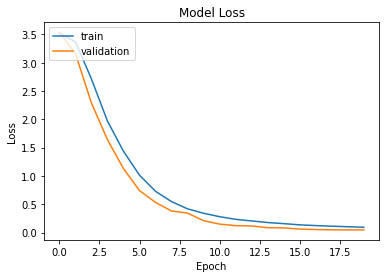

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Predict

In [ ]:
import tensorflow as tf

In [ ]:
load_model = tf.keras.models.load_model('/content/drive/MyDrive/Traffic Sign Recognition/model_v1.h5')

In [ ]:
img = cv2.imread('gtsrb/Test/00318.png')
img = cv2.resize(img, (32, 32))
img = np.array(img)
class_names[classes[np.argmax(load_model.predict(img.reshape(1, 32, 32, 3)))]]

'Turn right ahead'

Saving 00001.png to 00001 (1).png
Speed limit (30km/h)


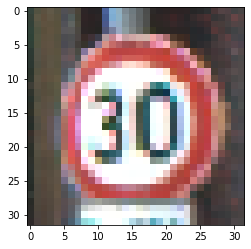

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(32, 32))
  plt.imshow(img)
  x = np.array(img)
  print(class_names[classes[np.argmax(load_model.predict(x.reshape(1, 32, 32, 3)))]])